<div style="border:solid Chocolate 2px; padding: 40px">

<b>Юлия, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# 1.[Цель](#id1)  
# 2.[Описание данных](#id2)  
# 3.[Изучение данных](#id3)  
# 4.[Разбитие данных на выборки](#id4)  
# 5.[Исследование моделей](#id5)  
# 6.[Проверка модели на тестовой выборке](#id6)  
# 7.[Проверка модели на адекватность](#id7)  
# 8.[Чек-лист готовности проекта](#id8)

<a id="id1"></a>
## Цель
Построить модель с максимально большим значением accuracy для задачи классификации, которая выберет подходящий тариф.

<a id="id2"></a>
## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц:
- **сalls** — количество звонков,
- **minutes** — суммарная длительность звонков в минутах,
- **messages** — количество sms-сообщений,
- **mb_used** — израсходованный интернет-трафик в Мб,
- **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

<a id="id3"></a>
## Изучение данных

In [1]:
# установим библиотеку
!pip install skimpy
# !pip install pandas-profiling

In [2]:
#загружаем необходимые библиотеки
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
import scipy
from scipy import stats as st
# импорт библиотеки warnings
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.datasets import make_classification, make_regression

from sklearn.preprocessing import StandardScaler


In [3]:
# задаем настройки среды визуализации

rcParams['figure.figsize'] = 10,4
%config InlineBackend.figure_format = 'svg' 

sns.set_style('darkgrid')
sns.set(font_scale=1)

In [4]:
# чтение файла
try:
    df = pd.read_csv(r'c:\\Users\\Юки\\AnaliticData\\DS _yandex\\5_обучение_с-учителем\\users_behavior.csv') #, sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [5]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
#Применение skimpy
from skimpy import skim, clean_columns
#df = clean_columns(df)
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3214   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0   ┃ p25      ┃ p75      ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ calls             │    0 │       0 │       63 │      33 │    0 │       40 │       82 │      240 │   ▄█▃▁   │  │
│ │ minutes           │    0 │       0 │      440 │     230 │    0 │      270 │      570 │     1600 │   ▄█▄▁   │  │
│ │ messages          │    0 │       0 │       38 │      36 │    0 │        9 │       57 │      220 │   █▄▂    │  │
│ │ mb_used           │    0 │       0 │    17000 │    7600 │    0 │    12000 │    21000 │    50000 │  ▂██▂▁   │  │
│ │ is_ultra          │    0 │       0 │     0.31 │    0.46 │    0 │        0 │        1 │        1 │  █    ▄  │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴──────┴──────────┴──────────┴──────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Вывод:  
загруженный датафрейм содержит 3214 наблюдений и 5 признаков;  
4 признака количественные (типа "float") и один признак **is_ultra** (наименование тарифа) категориальный;  
признак **is_ultra** - целевой;  
выборка не содердит пропусков;  
названия столбцов кажутся правильными, не требуется приведение к нижнему регистру.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"></a></h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, проведен первичный аналитический осмотр!) Полученная информация поможет нам в дальнейшем с предобработкой данных.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"></a></h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
- В данных есть мультиколлинеарность в фичах calls и minutes. Желательно проверить это методом `corr()` и удалить один из признаков для устранения проблемы. 
- Рекомендую также тебе посмотреть метод `sns.pairplot` с параметром `hue`, в который мы передаем целевой признак.
</div>


<a id="id4"></a>
## Разобьем данные на выборки

In [7]:
# выделим из датафрейма фичи
x = df.drop('is_ultra',axis=1)
columns_name = x.columns.tolist()
x.sample(5)

,calls,minutes,messages,mb_used
1667,10.0,63.03,0.0,2568.00
349,56.0,418.40,39.0,25111.53
1313,20.0,140.19,0.0,6553.24
2538,102.0,809.93,0.0,39195.64
2027,61.0,395.60,51.0,16001.36


In [8]:
# выделим искомый/целевой параметр
y=df.is_ultra
y.sample(5)

588     1
2484    0
3098    1
2788    0
483     0
Name: is_ultra, dtype: int64

In [9]:
# выделим тренировочную выборку:
train_x, valid_test_x, train_y, valid_test_y = train_test_split(
    x, y, test_size=0.4, random_state=123, shuffle = True, stratify=y)

In [10]:
print('Размер тренировочной выборки - {} объектов'.format(train_x.shape[0]))

Размер тренировочной выборки - 1928 объектов


In [11]:
# выделим валидационную и тестовую выборки:
valid_x, test_x, valid_y, test_y = train_test_split(
    valid_test_x, valid_test_y, test_size=0.5, random_state=123,stratify=valid_test_y)

In [12]:
print('Размер валидационной выборки - {} объектов'.format(valid_x.shape[0]))
print('Размер тестовой выборки - {} объектов'.format(test_x.shape[0]))

Размер валидационной выборки - 643 объектов
Размер тестовой выборки - 643 объектов


In [13]:
# выделим тренировочную и тестовую выборки для Кроссвалидации:
trainCV_x, testCV_x, trainCV_y, testCV_y = train_test_split(x, y, test_size=0.2,
                                                            random_state=123,stratify=y)
print('Размер тренировочной выборки - {} объектов'.format(trainCV_x.shape[0]))
print('Размер тестовой выборки - {} объектов'.format(testCV_x.shape[0]))

Размер тренировочной выборки - 2571 объектов
Размер тестовой выборки - 643 объектов


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"></a></h2>

<b>Все отлично!👍:</b> 
    
С разбиением все в порядке, а размеры полученных наборов напечатаны)

<a id="id5"></a>
## Исследуем модели

**1. Рассмотрим модель построенную на основании решающего дерева:**

In [14]:
# создадим списки accuracy для тестовой и валидационно выборок
train_scores = []
valid_scores = []

best_max_depth = 1
best_accuracy = 0

for n in range(1, 20):
    model = DecisionTreeClassifier(max_depth=n, random_state=123)
    model.fit(train_x, train_y)
    train_preds = model.predict(train_x)
    valid_preds = model.predict(valid_x)
    
    train_scores.append(accuracy_score(train_y, train_preds))
    valid_scores.append(accuracy_score(valid_y, valid_preds))
    
    if accuracy_score(valid_y, valid_preds) > best_accuracy:
        best_accuracy = accuracy_score(valid_y, valid_preds)
        best_max_depth = n
        
print(f'Лучшая глубина дерева: {best_max_depth}')
print(f'Лучшая метрика: {best_accuracy}')

Лучшая глубина дерева: 8
Лучшая метрика: 0.807153965785381


Визуализируем полученные результаты:

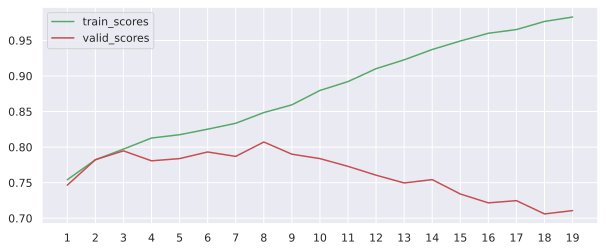

In [15]:
sns.lineplot(x=list(range(1, 20)), y=train_scores, color='g')
sns.lineplot(x=list(range(1, 20)), y=valid_scores, color='r')
plt.xticks(list(range(1, 20)))
plt.legend(['train_scores', 'valid_scores'], loc='upper left')
plt.show()

**Вывод:** визуализация подтверждает полученные результаты - лучшая глубина дерева = 8, так как далее результаты, полученный на валидационной выборке падают.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

Определим важность признаков:

In [16]:
model.feature_importances_

array([0.16436675, 0.27718447, 0.20177767, 0.3566711 ])

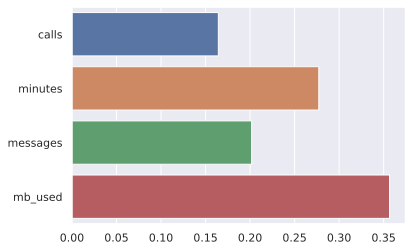

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.barplot(y=columns_name, x=model.feature_importances_, orient='h')
plt.tight_layout
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что не забываешь оценить важность признаков модели. 

___Рассмотрим кроссвалидацию для дерева решений:___

In [18]:
model = DecisionTreeClassifier(random_state=123)
params = {'max_depth':range(1,20)}
grid_model = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_model.fit(train_x, train_y)
print(f'Лучшая модель дерева: {grid_model.best_estimator_}')
print(f'Лучшая глубина дерева: {grid_model.best_params_}')
print(f'Лучшая метрика: {accuracy_score(valid_y, grid_model.best_estimator_.predict(valid_x))}')

Лучшая модель дерева: DecisionTreeClassifier(max_depth=4, random_state=123)
Лучшая глубина дерева: {'max_depth': 4}
Лучшая метрика: 0.7807153965785381


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
- Тут не следует использовать валидационную выборку. Правильно использовать атрибут `.best_score_`. 
    
- Если используешь кросс-валидацию, то подавать гридсерчу на обучение следует выборку, объединенную из train и validation выборок.   
 </div>

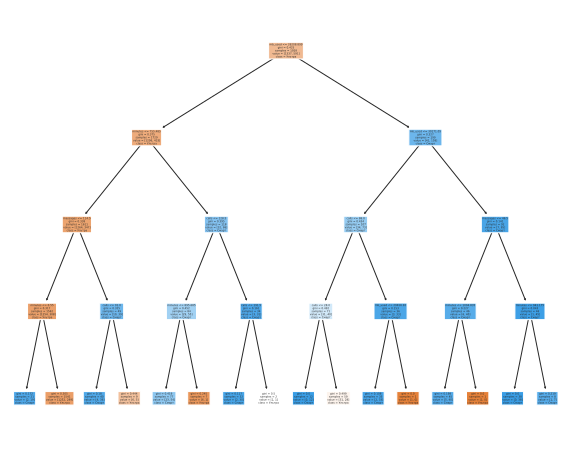

In [19]:
# визуализация модель при max_depth=4
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(train_x, train_y)

from sklearn.tree import plot_tree
fn = columns_name
cn = ['Ультра','Смарт']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

**2. Рассмотрим модель построенную на алгоритме классификации случайный лес** 

In [20]:
# построим модель с дефолтными параметрами:
model = RandomForestClassifier(random_state=123) 
model.fit(train_x, train_y)
rez = model.score(valid_x,valid_y)
print(rez)

0.7807153965785381


In [21]:
# подбирая параметры поработаем над улучшением модели:
train_scores = []
valid_scores = []

best_model = None
best_result = 0
best_max_depth = 0
best_n_estimators = 0

for i in range(10, 100,10):
    train_scores_max_depth = []
    valid_scores_max_depth = []
    for k in range (1,20):
        model = RandomForestClassifier(random_state=123, n_estimators=i, max_depth=k)  
        model.fit(train_x, train_y)
        train_scores_max_depth.append(model.score(train_x,train_y))
        valid_scores_max_depth.append(model.score(valid_x,valid_y))
        result = model.score(valid_x,valid_y)
        if result > best_result:
            best_model = model
            best_result = result
            best_n_estimators = i
            best_max_depth = k
   
    train_scores.append(max(train_scores_max_depth))
    valid_scores.append(max(valid_scores_max_depth))
       
    
print(f'Лучшая модель: {best_model}')
print(f'Лучшая метрика: {best_result}')
print(f'Лучшее количество деревьев: {best_n_estimators}')
print(f'Лучшая глубина дерева: {best_max_depth}')

Лучшая модель: RandomForestClassifier(max_depth=12, n_estimators=20, random_state=123)
Лучшая метрика: 0.8040435458786936
Лучшее количество деревьев: 20
Лучшая глубина дерева: 12


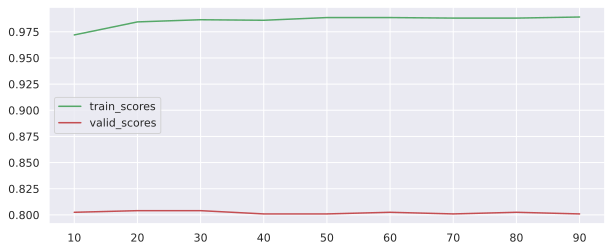

In [22]:
sns.lineplot(x=list(range(10, 100,10)), y=train_scores, color='g')
sns.lineplot(x=list(range(10, 100,10)), y=valid_scores, color='r')
plt.xticks(list(range(10, 100,10)))
plt.legend(['train_scores', 'valid_scores'], loc='center left')
plt.show()

Визуализация показывает, что натестовой выборке модель дает отличные результаты от 0,97 до 0,99, на валидационной выборке результаты хуже и максимальный результат, как было сказано выше, достигается при количестве деревьев = 20



___Рассмотрим кроссвалидацию для случайного леса:___

In [23]:
model = RandomForestClassifier(random_state=123)
params = {'max_depth':range(1,20), 'n_estimators':range(10,100,10)}
grid_model = GridSearchCV(model, params, cv=3, scoring='accuracy', verbose=1)
grid_model.fit(train_x, train_y)
print(f'Лучшая модель: {grid_model.best_estimator_}')
print(f'Лучшая метрика: {accuracy_score(valid_y, grid_model.best_estimator_.predict(valid_x))}')
print(f'Лучшие параметры: {grid_model.best_params_}')

Fitting 3 folds for each of 171 candidates, totalling 513 fits
Лучшая модель: RandomForestClassifier(max_depth=7, n_estimators=80, random_state=123)
Лучшая метрика: 0.7962674961119751
Лучшие параметры: {'max_depth': 7, 'n_estimators': 80}


**3. Логистическая регрессия**

In [24]:
# построим модель с дефолтными параметрами:
model = LogisticRegression(random_state=123, solver='lbfgs', max_iter=1000) 
model.fit(train_x, train_y)
model.score(valid_x, valid_y) 

0.6967340590979783

In [25]:
# подбирая параметры поработаем над улучшением модели:
train_scores = []
valid_scores = []

best_model = None
max_iter = 1
best_accuracy = 0

for n in [20, 50, 100, 200, 500, 1000]:
    model = LogisticRegression(random_state=123, solver='lbfgs', max_iter=n)
    model.fit(train_x, train_y)
        
    train_scores.append(model.score(train_x, train_y))
    valid_scores.append(model.score(valid_x, valid_y))
    
    if model.score(valid_x, valid_y) > best_accuracy:
        best_accuracy = model.score(valid_x, valid_y)
        max_iter = n
        
print(f'Лучшая модель: {best_model}')
print(f'Максимальное количество итераций, необходимых для сходимости решателей: {max_iter}')
print(f'Лучшая метрика: {best_accuracy}')

Лучшая модель: None
Максимальное количество итераций, необходимых для сходимости решателей: 50
Лучшая метрика: 0.6967340590979783


<div class="alert alert-warning">
    <h2> Комментарий ревьюера  <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

    
Лучшая модель у тебя не сохранилась
</div>

___Рассмотрим кроссвалидацию для логистическая регрессии:___

In [26]:
param_grid_lr = {'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=123), 
    param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(train_x, train_y)

print(f'Лучшая модель: {logModel_grid.best_estimator_}')
print(f'Лучшие параметры: {logModel_grid.best_params_}')
print(f'Лучшая метрика: {logModel_grid.best_estimator_.score(valid_x, valid_y)}')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Лучшая модель: LogisticRegression(class_weight='balanced', max_iter=50, random_state=123,
                   solver='newton-cg')
Лучшие параметры: {'class_weight': 'balanced', 'max_iter': 50, 'solver': 'newton-cg'}
Лучшая метрика: 0.6174183514774495


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>

В аргументе  GridSearchCV следует указать `scoring='accuracy'`
</div>

**Вывод:**  
Исходя из проведенного исследования, лучшие результаты показала модель "решающее дерево", благодаря подбору параметров удалось получить наилучшую метрику: 0.807153965785381, с небольшим отрывом в качестве результатов работы следует модель "случайный лес"(лучшая метрика: 0.8040435458786936).  

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"></a></h2>

<b>Все отлично!👍:</b>

В остальном, модели исследованы корректно:
    
 - исследовано более 5 значений гиперпараметра
 - модели обучены на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
 - есть выводы   
</div>

<a id="id6"></a>
## Проверим модель на тестовой выборке

Произведем проверку работы модели "решающее дерево" на тестовой выборке:

In [27]:
model = DecisionTreeClassifier(max_depth=8, random_state=123)
model.fit(train_x, train_y)
preds = model.predict(test_x)
accuracy = accuracy_score(test_y, preds)

print(f'метрика на тестовой выборке: {accuracy}')

метрика на тестовой выборке: 0.7931570762052877


Таким образом получена приемлемая для данного эксперимента метрика качества работы модели - удалось достичь accuracy не меньше 0.75.   
Считаем эксперимент успешным.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
На тестовой выборке получено хорошее качество)

<a id="id7"></a>
## (бонус) Проверем модели на адекватность

Воспользуемся готовым классификатором для обучения baseline модели, как простой базовой линией для сравнения другим, ранее рассмотренными классификаторами

In [28]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(train_x, train_y)
dummy_clf.score(valid_x,valid_y)

0.6936236391912908

**Вывод:** значения accuracy у рассмотренных выше моделей значительно лучше.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проводишь сравнение своей модели с константной дамми моделью. В каждом проекте при оценке качества модели, имеет смысл проводить такую проверку на адекватность. Подробнее можешь прочитать в статье: https://progler.ru/blog/ml-klassifikatory-pustyshki-s-ispolzovaniem-sklearn

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее впечатление о проекте. Молодец! Изучены все параметры, построено несколько моделей классификации и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- тебе удалось добиться очень хорошего качества, поздравляю!  
- при обучении моделей использована валидационная выборка и подбор гиперпараметров.    
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта - моделирование. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<a id="id8"></a>
## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
